Target: RainTomorrow
Binary target: True | unique: [0 1]
Train: 311 | Test: 78


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 7, 32)               │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,449 (9.57 KB)

 Trainable params: 2,449 (9.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7204 - loss: 0.6082 - mae: 0.4310 - val_accuracy: 0.7188 - val_loss: 0.6011 - val_mae: 0.4117
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7348 - loss: 0.5963 - mae: 0.4010 - val_accuracy: 0.7188 - val_loss: 0.6064 - val_mae: 0.3943
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7312 - loss: 0.5813 - mae: 0.3940 - val_accuracy: 0.7188 - val_loss: 0.6126 - val_mae: 0.4058
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7204 - loss: 0.5869 - mae: 0.4075 - val_accuracy: 0.7188 - val_loss: 0.6138 - val_mae: 0.3999
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7240 - loss: 0.5947 - mae: 0.3973 - val_accuracy: 0.7188 - val_loss: 0.6146 - val_mae: 0.4024
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.5769 - mae: 0.3947 - val_accuracy: 0.7188 - val_loss: 0.6063 - val_mae: 0.3932
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

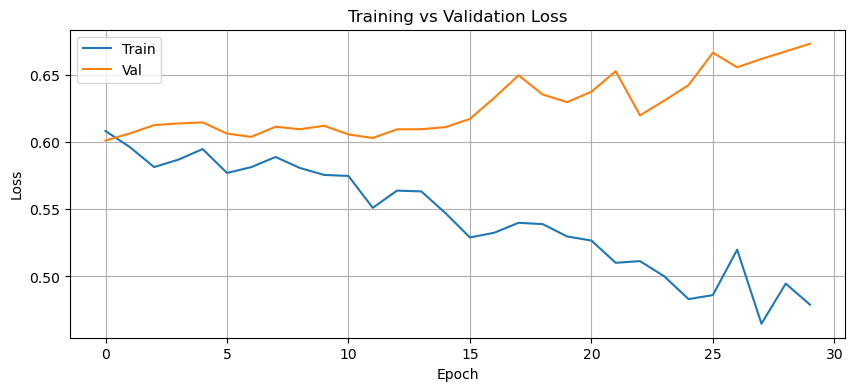

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Numeric eval (RainTomorrow): RMSE=0.5089, MAE=0.4545
Classification: Acc=0.5769, Prec=0.2963, Rec=0.3636, F1=0.3265

Sample decisions (Actual vs Pred):
    Actual  Pred
0        0     0
1        0     0
2        0     0
3        1     1
4        0     0
5        1     1
6        0     1
7        0     0
8        0     1
9        0     0
10       0     0
11       0     0
12       1     0
13       0     1
14       0     0
15       1     0
16       0     0
17       0     0
18       0     0
19       0     1

According to the model, will it rain tomorrow? -> No


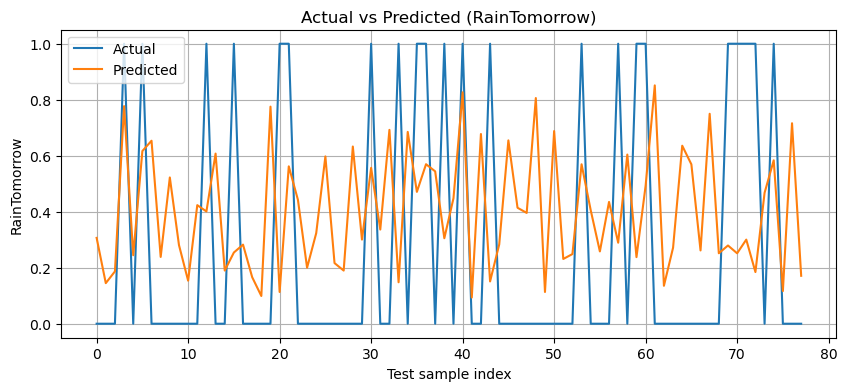

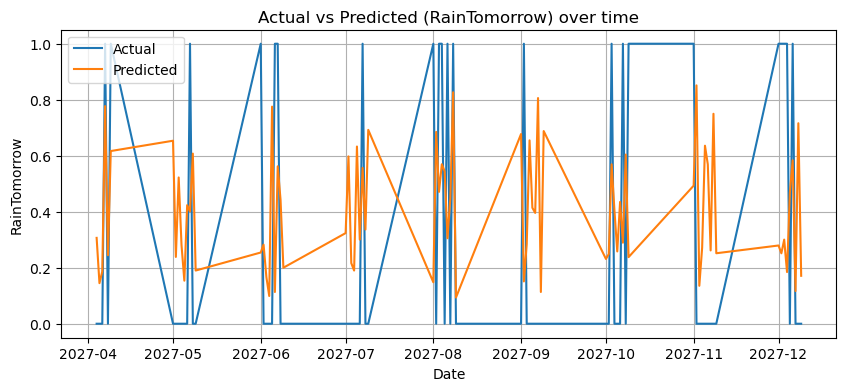

In [8]:
# ==== Compact SimpleRNN time-series (CSV, custom model) ====
FILE_PATH       = "dataset.csv"
TARGET_COL_NAME = None      # e.g. "RainTomorrow"; None → last numeric col
WINDOW_SIZE     = 7
TEST_RATIO      = 0.2
EPOCHS          = 30
BATCH_SIZE      = 16
THRESH          = 0.5       # for binary targets

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

plt.rcParams["figure.figsize"] = (10,4)

# --- load & prep ---
df = pd.read_csv(FILE_PATH)
date_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)
else:
    df = df.sort_index()

for c in df.select_dtypes(include="object"):
    v = df[c].dropna().str.strip().str.lower()
    if set(v.unique()) <= {"yes","no","y","n"}:
        df[c] = v.map({"yes":1,"y":1,"no":0,"n":0})

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not num_cols: raise ValueError("No numeric columns in file.")
target_col = TARGET_COL_NAME or num_cols[-1]
if target_col not in num_cols: raise ValueError(f"Bad target: {target_col}")
print("Target:", target_col)

tvals  = df[target_col].dropna().unique()
binary = set(tvals) <= {0,1}
print("Binary target:", binary, "| unique:", tvals)

X_cols = num_cols
data   = df[X_cols].values
mask   = ~np.isnan(data).any(axis=1)
data   = data[mask]
idx    = df.index[mask]

# --- scale & sequences ---
scaler = MinMaxScaler()
data_s = scaler.fit_transform(data)

def make_seq(a, win, tidx):
    X, y = [], []
    for i in range(len(a)-win):
        X.append(a[i:i+win]); y.append(a[i+win, tidx])
    return np.array(X), np.array(y)

tidx        = X_cols.index(target_col)
X, y        = make_seq(data_s, WINDOW_SIZE, tidx)
if len(X) == 0: raise ValueError("Not enough data for this WINDOW_SIZE.")
n_tr        = int(len(X)*(1-TEST_RATIO))
X_tr, X_te  = X[:n_tr], X[n_tr:]
y_tr, y_te  = y[:n_tr], y[n_tr:]
print("Train:", X_tr.shape[0], "| Test:", X_te.shape[0])

# --- custom SimpleRNN model ---
steps, feats = X_tr.shape[1], X_tr.shape[2]
act   = "sigmoid" if binary else None
loss  = "binary_crossentropy" if binary else "mse"
mets  = ["accuracy","mae"] if binary else ["mae"]

model = Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=(steps, feats)),
    Dropout(0.2),
    SimpleRNN(16),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation=act)
])
model.compile(optimizer="adam", loss=loss, metrics=mets)
model.summary()

hist = model.fit(X_tr, y_tr, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 validation_split=0.1, verbose=1)

# --- loss curve ---
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Val")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

# --- predict & inverse scale ---
y_pred_s = model.predict(X_te)

dummy_p = np.zeros((len(y_pred_s), len(X_cols)))
dummy_p[:, tidx] = y_pred_s.ravel()
y_pred = scaler.inverse_transform(dummy_p)[:, tidx]

dummy_t = np.zeros((len(y_te), len(X_cols)))
dummy_t[:, tidx] = y_te
y_true = scaler.inverse_transform(dummy_t)[:, tidx]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"\nNumeric eval ({target_col}): RMSE={rmse:.4f}, MAE={mae:.4f}")

# --- binary metrics + rain decision (if needed) ---
if binary:
    y_true_bin = (y_true >= THRESH).astype(int)
    y_pred_bin = (y_pred >= THRESH).astype(int)
    acc  = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, zero_division=0)
    rec  = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1   = f1_score(y_true_bin, y_pred_bin, zero_division=0)
    print(f"Classification: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")
    print("\nSample decisions (Actual vs Pred):")
    print(pd.DataFrame({"Actual": y_true_bin, "Pred": y_pred_bin}).head(20))
    # one-sentence answer based on last test prediction
    will_rain = "Yes" if y_pred_bin[-1] == 1 else "No"
    print(f"\nAccording to the model, will it rain tomorrow? -> {will_rain}")

# --- plots ---
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title(f"Actual vs Predicted ({target_col})")
plt.xlabel("Test sample index"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.show()

if date_col:
    dates_all = idx[WINDOW_SIZE:]
    dates_te  = dates_all[n_tr:]
    if len(dates_te) == len(y_true):
        plt.plot(dates_te, y_true, label="Actual")
        plt.plot(dates_te, y_pred, label="Predicted")
        plt.title(f"Actual vs Predicted ({target_col}) over time")
        plt.xlabel("Date"); plt.ylabel(target_col)
        plt.legend(); plt.grid(True); plt.show()
